In [2]:
'''Python Notebook for MIR Group Project'''
'''Jamila, Henry, and Paul'''

'Jamila, Henry, and Paul'

In [3]:
import IPython.display as ipd
import librosa
import matplotlib.pyplot as plt
import numpy as np
#from parse_audio import plot_sound

def plot_sound(labeldict, filedir, filename):
    audio, _ = librosa.load(filedir+filename)
    plt.plot(np.abs(audio))
    plt.ylabel('Amplitude')
    plt.show()
def rms_track(data, hopSize, winSize):
    offsets = np.arange(0, len(data), hopSize)
    rms_track = np.zeros(len(offsets))
    
    for (m,o) in enumerate(offsets): 
        frame = data[o:o+winSize] 
        rms_track[m] = np.sqrt(np.mean(np.square(frame)))  
    return (rms_track)
def get_audio_thresh(filedir, filename, percent, hopsz=2048, winsz=2048):
    audio, sr = librosa.load(filedir+filename)
    pt = rms_track(audio, hopsz, winsz)
    max_peak = max(pt)
    thresh = max_peak * percent
    peaks = np.where(pt<thresh, 0, pt)
    peaks = peaks[:256]
    acr = np.correlate(peaks, peaks, mode='full')
    acr = acr[int(len(acr)/2):]
    acr_peak_location = np.argmax(acr[1:])+1
    # calculate bpm
    indices = np.nonzero(peaks)[0]
    period_in_frames = np.median(np.diff(indices))
    period_in_samples = period_in_frames * hopsz
    period_in_secs = period_in_samples / sr
    bpm = 60.0 / period_in_secs
    print("%2.2f BPM" %  (bpm))

labels = {} # [ whistled, hooting, clicking, burry or buzzy, nasal, noisy, polyphonic ] 
path = './wav/'

In [4]:
plot_sound(labels, path, '115656.wav')

/Users/jamila/Library/Python/3.8/lib/python/site-packages/librosa/core/audio.py:162: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


FileNotFoundError: [Errno 2] No such file or directory: './wav/115656.wav'

In [ ]:
audio, sr = librosa.load(path+'132026.wav')
ipd.Audio(audio, rate=sr)

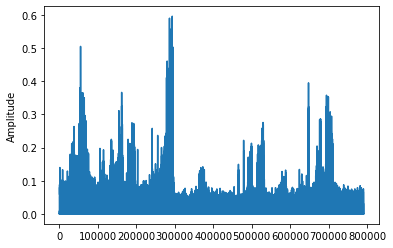

In [ ]:
plot_sound(labels, path, '132026.wav')

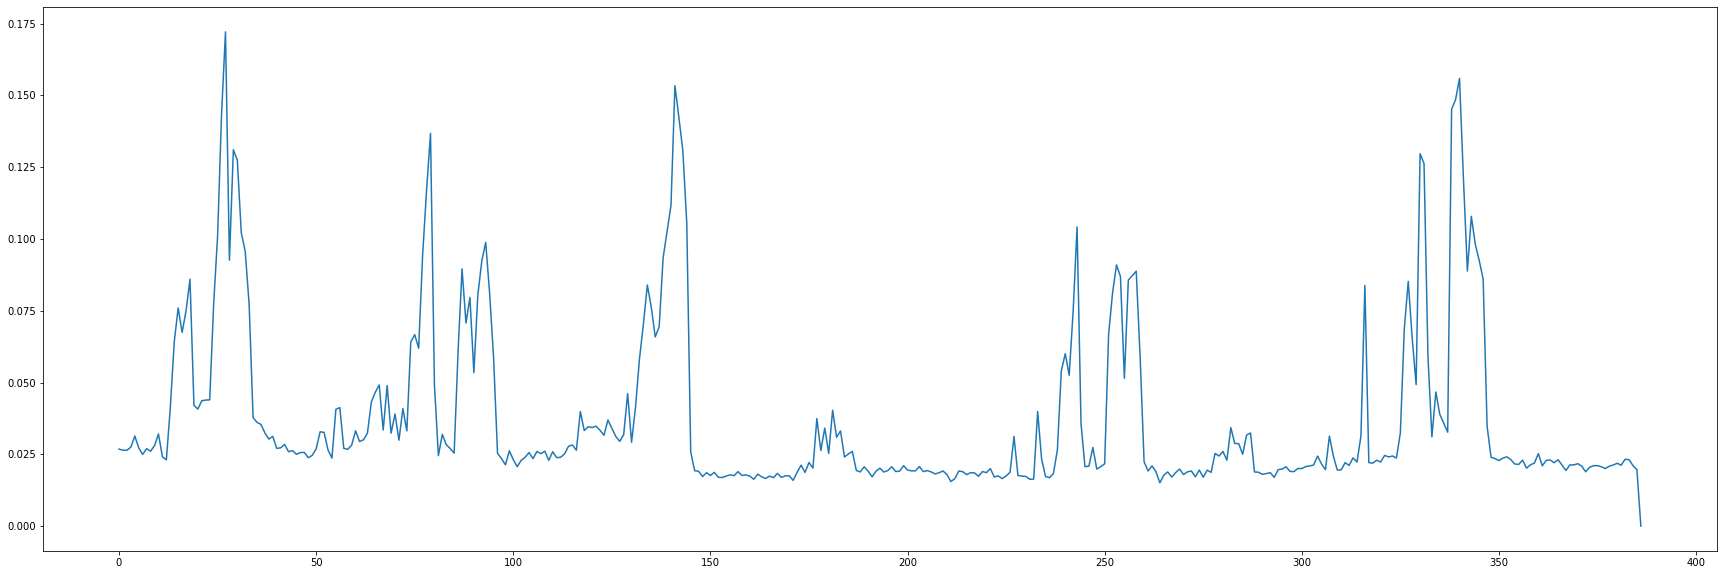

In [ ]:
# Plot rms
hopsz = winsz = 2048
pt = rms_track(audio, hopsz, winsz)
plt.figure(figsize=(30,10))
plt.plot(pt)

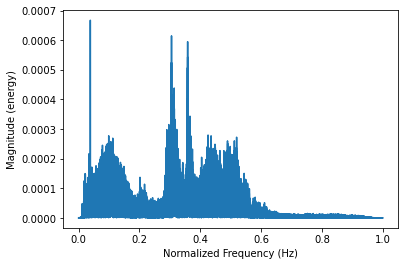

In [ ]:
plt.magnitude_spectrum(audio)
plt.xlabel('Normalized Frequency (Hz)')
lows = np.where(audio<0.0003, 0, audio) # lower threshold
ipd.Audio(lows, rate=sr)

In [ ]:
get_audio_thresh(path,'132026.wav',.87)

5.67 BPM


In [5]:
import json
def get_bird_type(fullname):
    splitfn = fullname.split()
    birdtype = splitfn[len(splitfn)-1]
    return birdtype
def check_then_add(d, longname, v):
    k = get_bird_type(longname)
    if k in d:
        d[k].append(v)
    else:
        d[k] = [v]
    return d

# Opening JSON file
f = open('ref.json')
 
# returns JSON object as
# a dictionary
data = json.load(f)

# Iterating through the json
# list
# Add entries to dictionary where keys are  id's to list
birddict = {}
for r in data['recordings']:
    #print('id: %s, genus: %s, species: %s, name: %s' % (r['id'], r['gen'], r['sp'], r['en']))
    birddict = check_then_add(birddict, r['en'], r['id'])
    
# Closing file
f.close()

In [6]:
birddict

{'Goose': ['159949', '160186'],
 'Swan': ['696429'],
 'Duck': ['679723', '161436', '160050', '160049', '157581', '160185'],
 'Shoveler': ['159952', '161636'],
 'Wigeon': ['397329', '454616', '396690', '165450', '159951'],
 'Mallard': ['696664', '692779', '661079', '163618', '159275'],
 'Pintail': ['159953'],
 'Teal': ['161633', '142831'],
 'Merganser': ['161890', '142827', '65866', '142828', '156775', '161888'],
 'Quail': ['648360', '648358', '648354', '156533'],
 'Grebe': ['689859'],
 'Bittern': ['160043', '160042', '160036', '127371'],
 'Heron': ['160005'],
 'Cormorant': ['160073'],
 'Hawk': ['692318', '159446', '114400', '159438', '187482', '183586'],
 'Eagle': ['699908', '696087', '683701', '74418'],
 'Rail': ['701094',
  '691188',
  '687815',
  '687701',
  '686463',
  '686186',
  '686056',
  '679454',
  '159715',
  '66099',
  '161428',
  '159792',
  '159714',
  '159700',
  '159698',
  '157577',
  '160129',
  '159732',
  '159498',
  '159135',
  '159119',
  '159118'],
 'Sora': ['160